INSTALLING THE PROPHET

 Prophet will be our baseline model and we need to prove that AI adds value. Facebook prophet is the industry standard for time-series forecasting. It looks at trends and holidays, ignoring sentiment entirely. 

 We will get a MAE score and if the LSTM beats this score later, we have a winning project.


In [2]:
#intalling prophet
!pip install prophet plotly

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 3.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/12.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/12.1 MB 2.3 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/12.1 MB 2.4 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.1 MB 2.4 MB/s eta 0:00:05
   --------- ------------------------------ 2.9/12.1 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 3.4/12.1 MB 2.3 MB/s eta 0:00:04
   ------------ --------------------------- 3.7/12.1 MB 2.4 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.1 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 4.5/12.1 MB 2.2 MB/s eta 0:00:04
   --------------- ------------------------ 4.7/12.1 MB 2.1 MB/s eta 0:00:04
   ----------------- ---------------------- 5.2/12.1 MB 2.1 MB/s eta 0:00:04
   ---

Training Days: 571
Testing Days: 143


18:37:10 - cmdstanpy - INFO - Chain [1] start processing
18:37:11 - cmdstanpy - INFO - Chain [1] done processing


Baseline MAE (Mean Absolute Error): $8201.92
Baseline RMSE: $10594.52


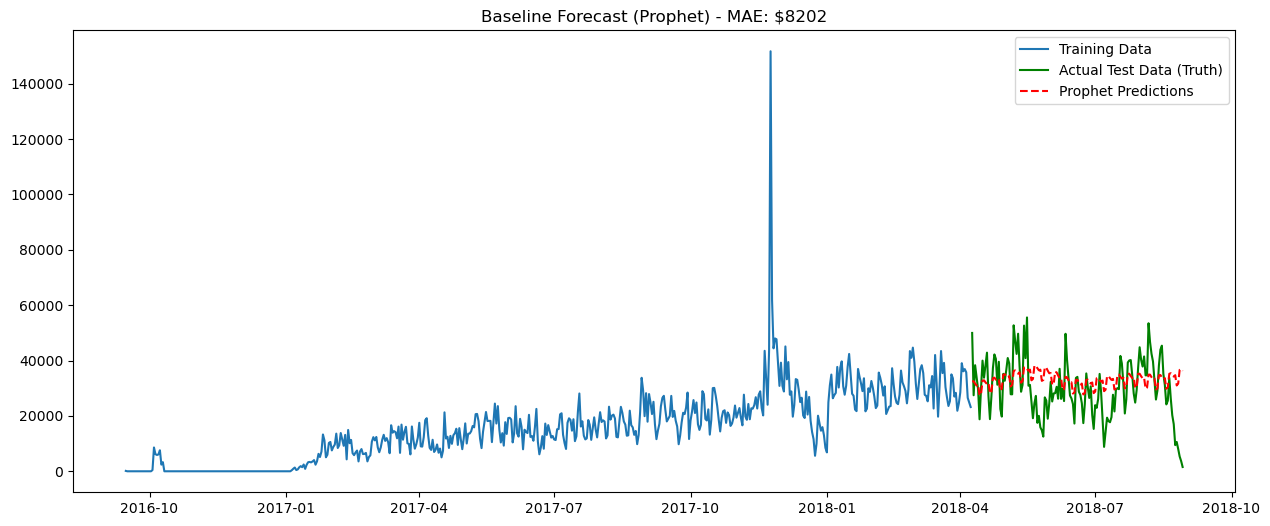

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import os

# 1. Load Data
PROCESSED_PATH = os.path.join("..", "data", "processed")
df = pd.read_csv(os.path.join(PROCESSED_PATH, "daily_sales_sentiment.csv"))

# Ensure date is datetime
df['ds'] = pd.to_datetime(df['ds'])

# 2. Split Data (Crucial!)
# We cannot randomly shuffle time-series data. We must cut it at a specific date.
# We will train on the first 80% and test on the last 20%.
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

print(f"Training Days: {len(train_df)}")
print(f"Testing Days: {len(test_df)}")

# 3. Train Prophet (The Standard Model)
# Prophet handles seasonality (weekly/yearly trends) automatically.
m = Prophet(yearly_seasonality=True, daily_seasonality=False)
m.fit(train_df)

# 4. Make Predictions
# We ask Prophet to predict the future (the size of our test set)
future = m.make_future_dataframe(periods=len(test_df))
forecast = m.predict(future)

# 5. Evaluate
# We extract the predictions that correspond to our test set
predictions = forecast.iloc[train_size:]['yhat']
actuals = test_df['y']

# Calculate Error
mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))

print(f"Baseline MAE (Mean Absolute Error): ${mae:.2f}")
print(f"Baseline RMSE: ${rmse:.2f}")

# 6. Visualize the Forecast vs Reality
plt.figure(figsize=(15, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data (Truth)', color='green')
plt.plot(test_df['ds'], predictions, label='Prophet Predictions', color='red', linestyle='--')
plt.title(f"Baseline Forecast (Prophet) - MAE: ${mae:.0f}")
plt.legend()
plt.show()

From the above, we can see that the prophet is basically a flat and it completely fails to catch the sharp spikes and drops of the actual sales in green. We will now proceed to train LSTM.